In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn import metrics

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Load your historical stock price data from a CSV file
microsoftdata = pd.read_csv("C:/Users/Lenovo/Desktop/MSFT.csv")

In [3]:
#display the first five rows
microsoftdata.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.062549,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064783,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065899,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.064224,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.063107,47894400


In [4]:
#display the shape of the dataset
microsoftdata.shape

(8525, 7)

In [5]:
microsoftdata.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8525.000000,8525.000000,8525.000000,8525.000000,8525.000000,8.525000e+03
mean,28.220247,28.514473,27.918967,28.224480,23.417934,6.045692e+07
std,28.626752,28.848988,28.370344,28.626571,28.195330,3.891225e+07
min,0.088542,0.092014,0.088542,0.090278,0.058081,2.304000e+06
25%,3.414063,3.460938,3.382813,3.414063,2.196463,3.667960e+07
50%,26.174999,26.500000,25.889999,26.160000,18.441576,5.370240e+07
75%,34.230000,34.669998,33.750000,34.230000,25.392508,7.412350e+07
max,159.449997,160.729996,158.330002,160.619995,160.619995,1.031789e+09


In [6]:
#dataset information
microsoftdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8525 entries, 0 to 8524
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8525 non-null   object 
 1   Open       8525 non-null   float64
 2   High       8525 non-null   float64
 3   Low        8525 non-null   float64
 4   Close      8525 non-null   float64
 5   Adj Close  8525 non-null   float64
 6   Volume     8525 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 466.3+ KB


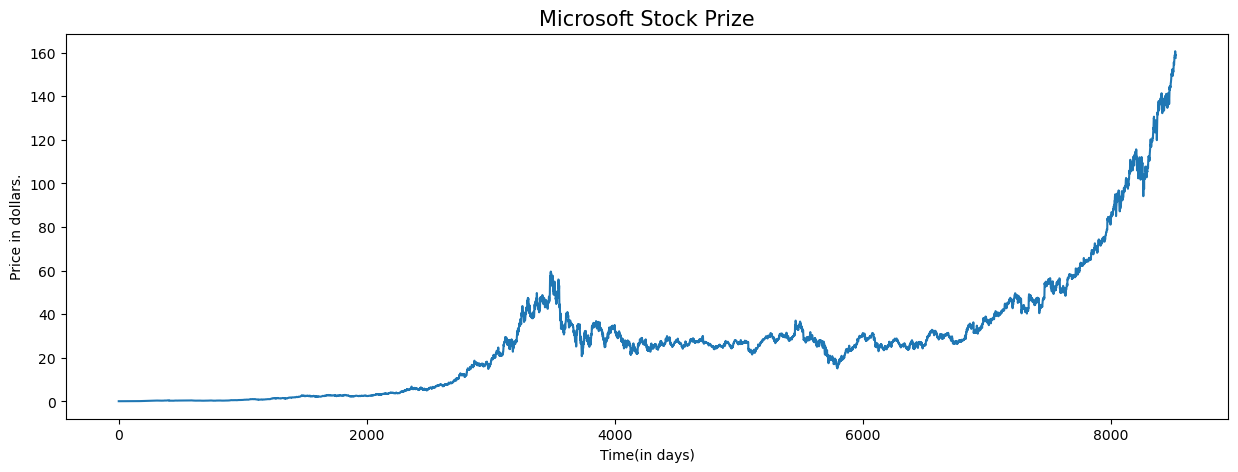

In [7]:
# Analyse the stock prize data and how prices of the stock have moved over the period of time
plt.figure(figsize=(15,5))
plt.plot(microsoftdata['Close'])
plt.title('Microsoft Stock Prize', fontsize=15)
plt.xlabel("Time(in days)")
plt.ylabel('Price in dollars.')
plt.show()


In [8]:
microsoftdata.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.062549,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064783,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065899,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.064224,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.063107,47894400


In [9]:
microsoftdata[microsoftdata['Close'] == microsoftdata['Adj Close']].shape

(32, 7)

In [10]:
# drop the 'adj close' due to the redundancy with close
microsoftdata= microsoftdata.drop(['Adj Close'], axis=1)

In [11]:
#display the null values in the column
microsoftdata.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

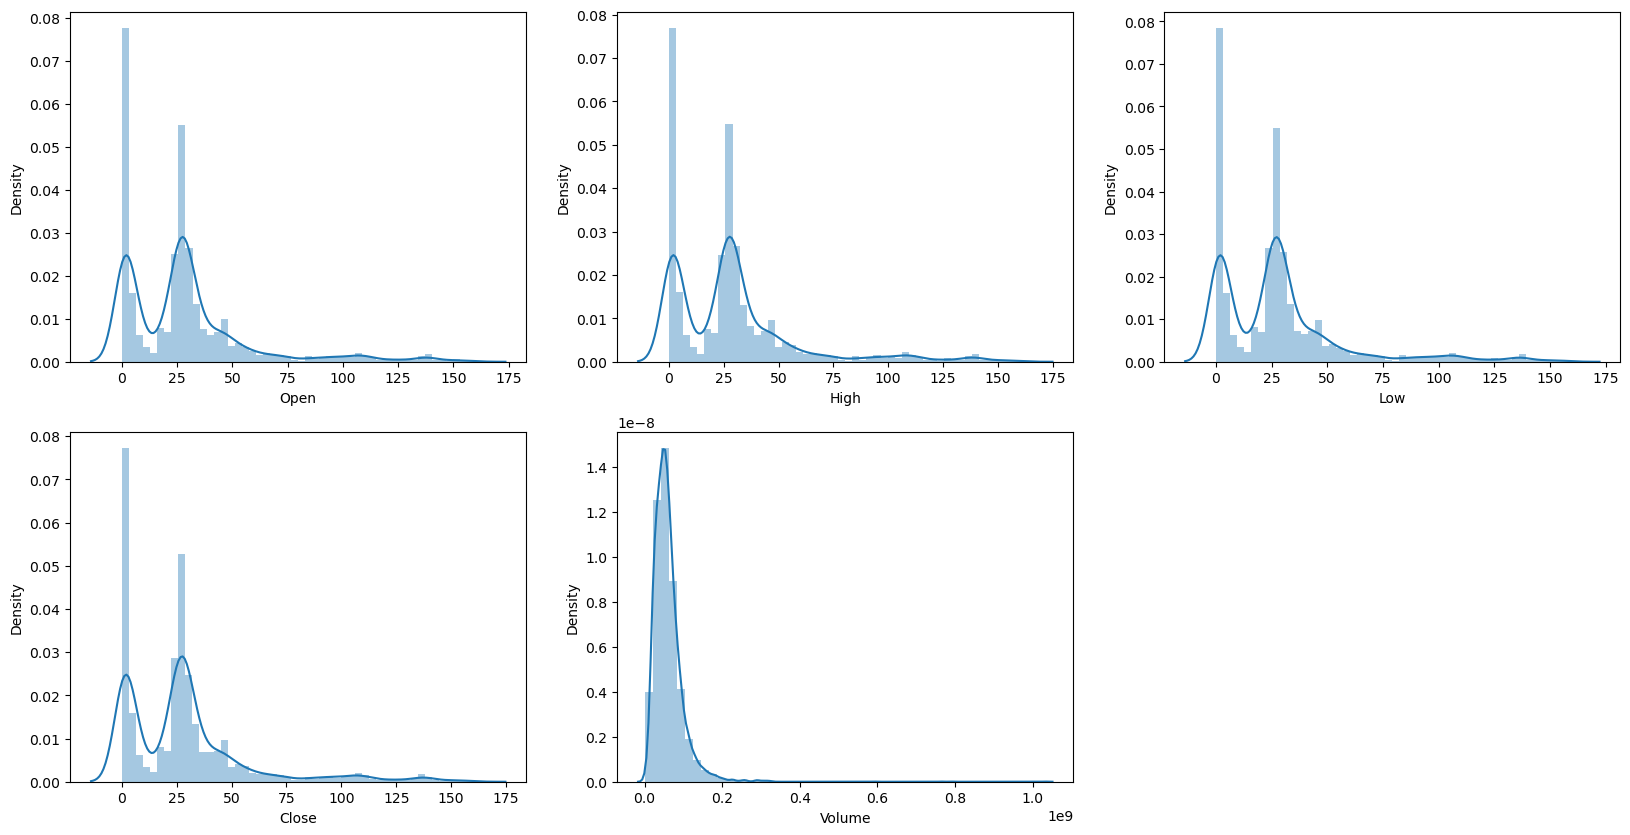

In [12]:
# distribution plot of the continuous variable
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(microsoftdata[col])
plt.show()


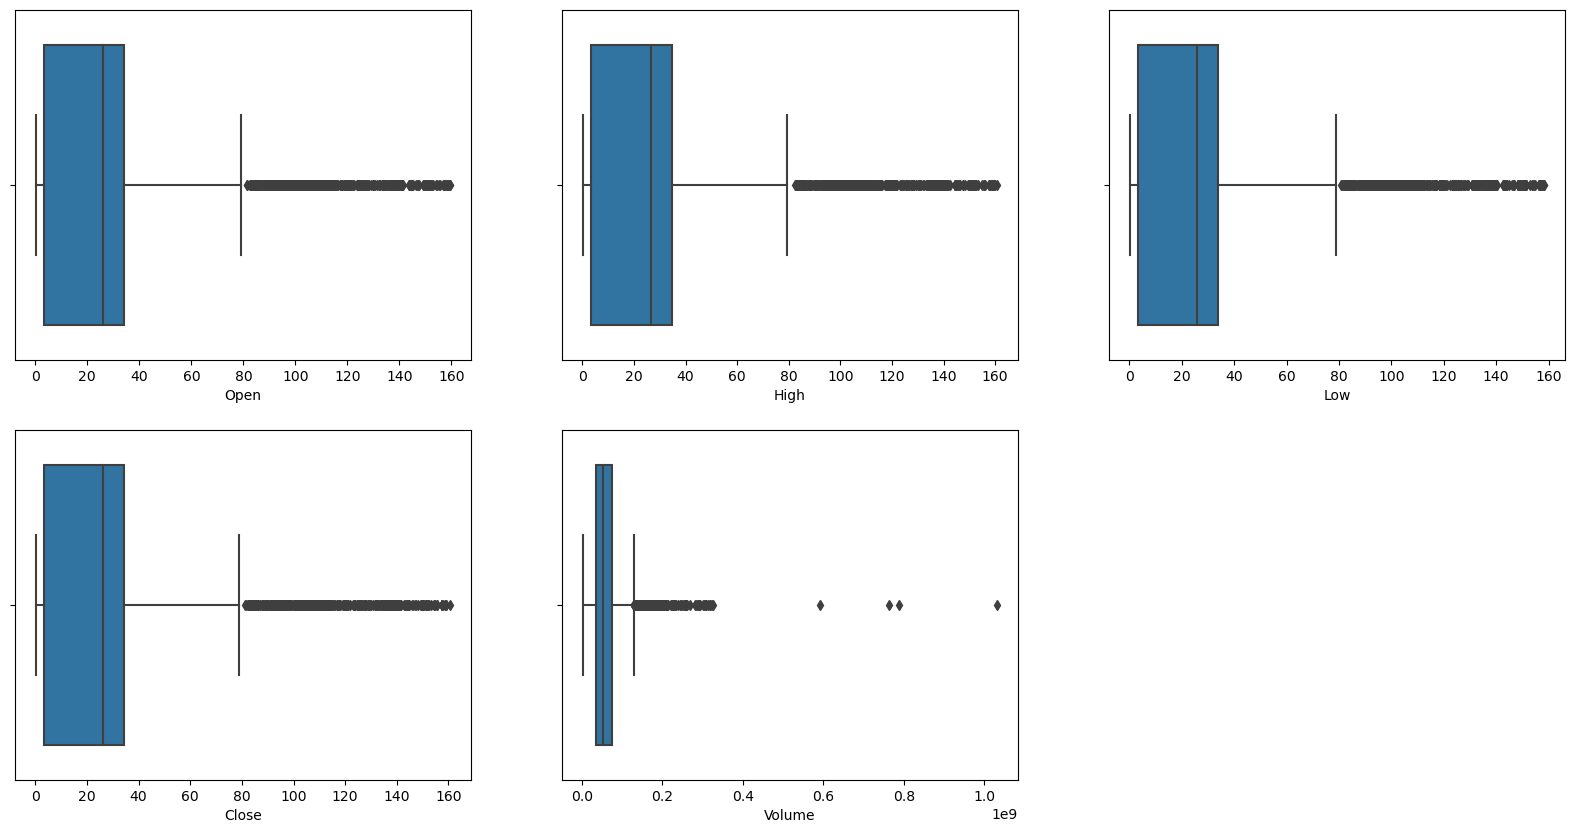

In [13]:
#from this boxplot we can conclude volume data contains outliers
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(microsoftdata[col])
plt.show()


In [14]:
# Feature engineering
# here we added three more column namely day,month,year from Date column
splitted = microsoftdata['Date'].str.split('-', expand=True)
microsoftdata['day'] = splitted[2].astype('int')
microsoftdata['month'] = splitted[1].astype('int')
microsoftdata['year'] = splitted[0].astype('int')
microsoftdata.head()


,Date,Open,High,Low,Close,Volume,day,month,year
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,1031788800,13,3,1986
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,308160000,14,3,1986
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,133171200,17,3,1986
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,67766400,18,3,1986
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,47894400,19,3,1986


In [15]:
# in company quaterly results affect the stock prices heavily so we add this feature is_quarter_end
microsoftdata['is_quarter_end'] = np.where(microsoftdata['month']%3==0,1,0)
microsoftdata.head()


,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,1031788800,13,3,1986,1
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,308160000,14,3,1986,1
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,133171200,17,3,1986,1
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,67766400,18,3,1986,1
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,47894400,19,3,1986,1


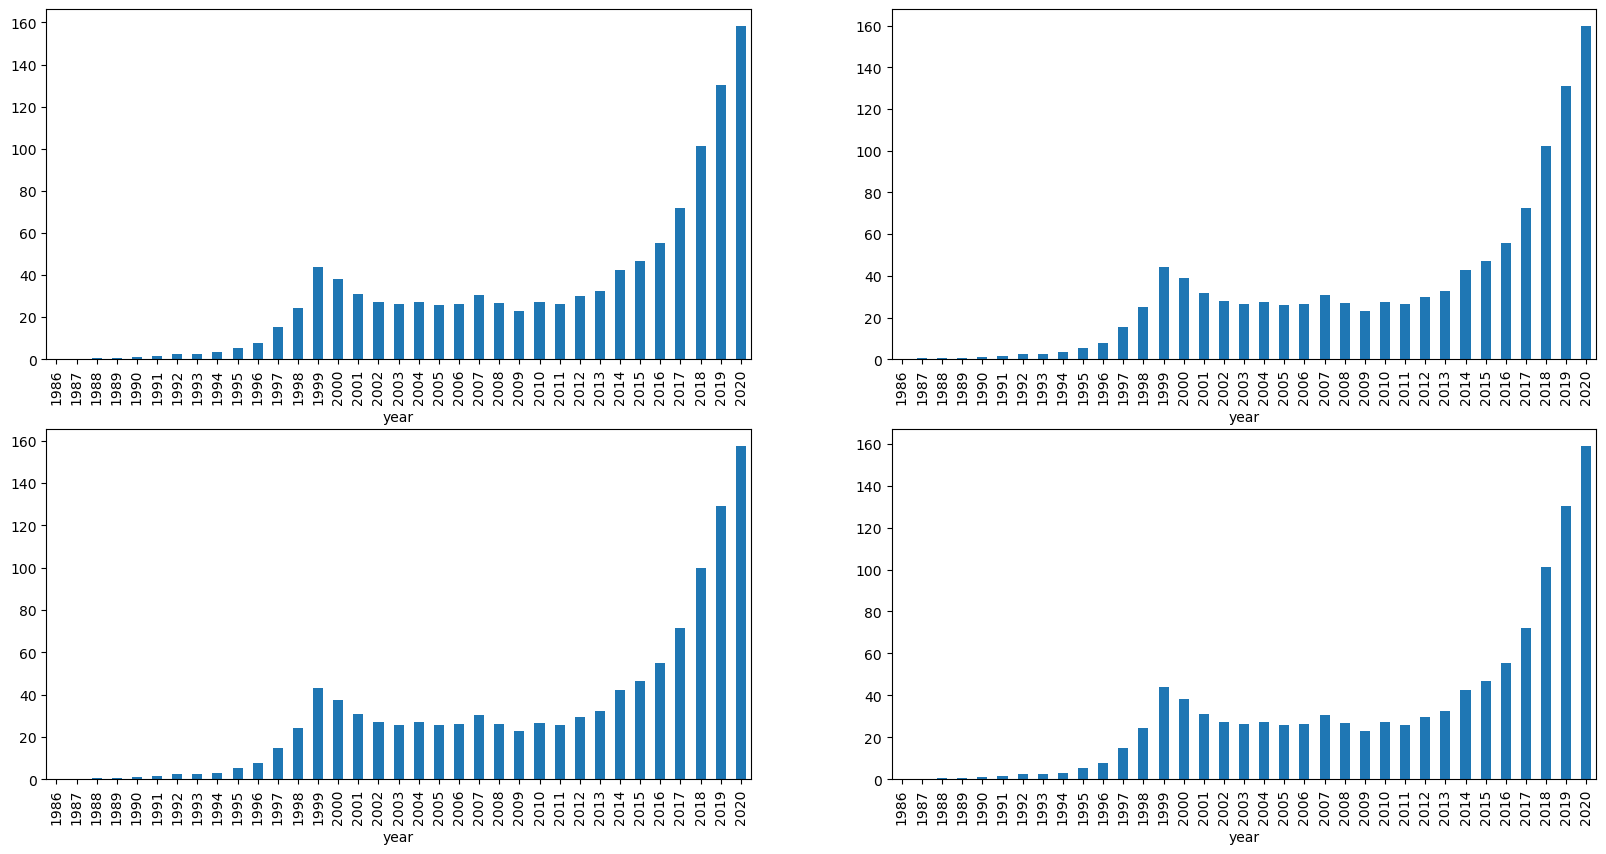

In [16]:
data_grouped = microsoftdata.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()


In [17]:
# we group the quarter end and non-quarter end datas and get its mean value
microsoftdata.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,28.222251,28.513631,27.914680,28.222111,6.208880e+07,15.718402,6.111366,2002.623122
1,28.216294,28.516136,27.927422,28.229154,5.723811e+07,15.779289,7.453975,2002.505927


In [18]:
microsoftdata['open-close'] = microsoftdata['Open'] - microsoftdata['Close']
microsoftdata['low-high'] = microsoftdata['Low'] - microsoftdata['High']
# we have added the target feature which is the signal whether to buy or not
# np.where function returns the indices of elements in an input array
microsoftdata['target'] = np.where(microsoftdata['Close'].shift(-1) > microsoftdata['Close'], 1, 0)

# Output array contain elements of x where condition is true and element from y elsewhere
microsoftdata['target']

0       1
1       1
2       0
3       0
4       0
       ..
8520    1
8521    0
8522    1
8523    0
8524    0
Name: target, Length: 8525, dtype: int32

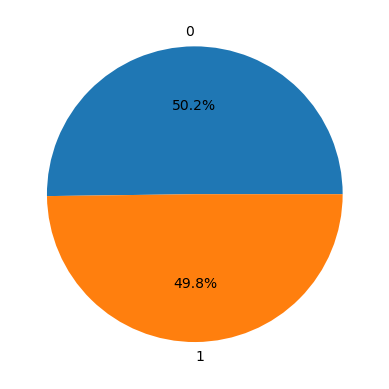

In [19]:
# we check whether the target variable is balanced or not using piechart
plt.pie(microsoftdata['target'].value_counts().values, labels=[0, 1], autopct='%1.1f%%')
plt.show()


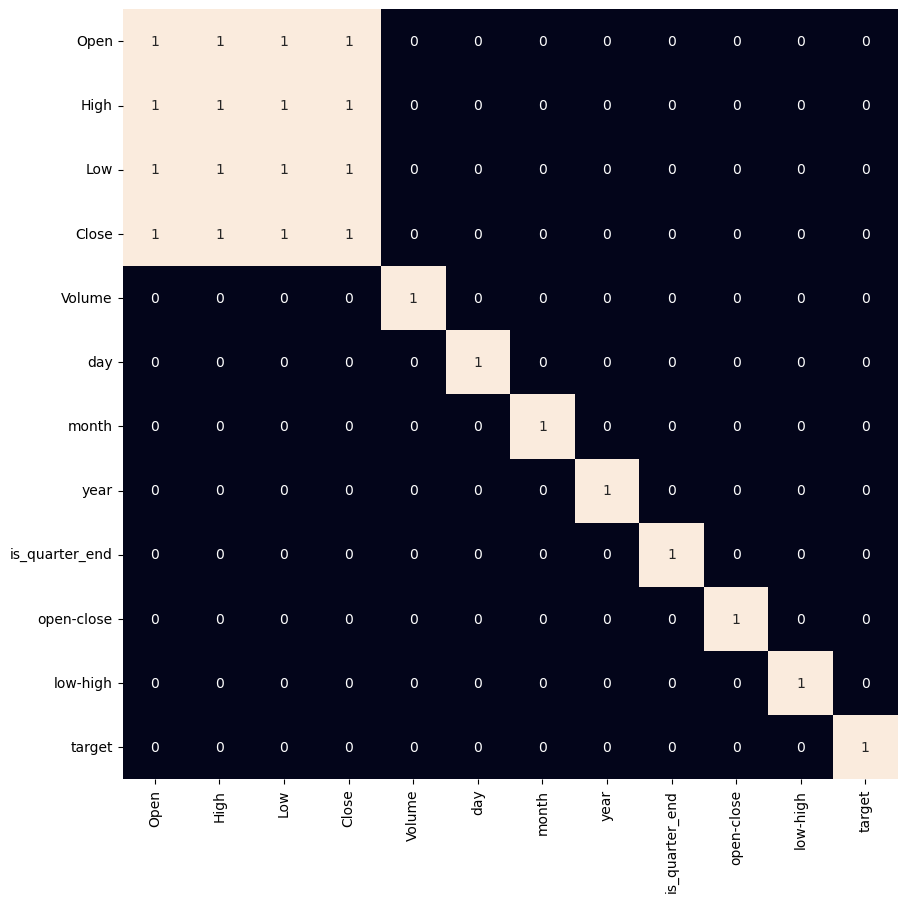

In [20]:
plt.figure(figsize=(10, 10))

#As our concern is with the highly correlated features only so, we will visualize our heatmap as per that criteria only.
sb.heatmap(microsoftdata.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [21]:
# datasplitting and normalization for the stable and training the model
features = microsoftdata[['open-close', 'low-high', 'is_quarter_end']]
target = microsoftdata['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(7672, 3) (853, 3)


In [22]:
# training data using logisticregression,svc,xgbclassifier

models = [LogisticRegression(), SVC(

  kernel='poly', probability=True), XGBClassifier()]
 

for i in range(3):

  models[i].fit(X_train, Y_train)
 

  print(f'{models[i]} : ')
#   here we added roc_auc_score to measure the accuracy of prediction with soft probabilities
# ie. continuous variable between 0 and 1
  print('Training Accuracy : ', metrics.roc_auc_score(

    Y_train, models[i].predict_proba(X_train)[:,1]))

  print('Validation Accuracy : ', metrics.roc_auc_score(

    Y_valid, models[i].predict_proba(X_valid)[:,1]))

  print()

LogisticRegression() : 
Training Accuracy :  0.5265452223567904
Validation Accuracy :  0.5147828001982051

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5247874775549929
Validation Accuracy :  0.529645433023179

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training A

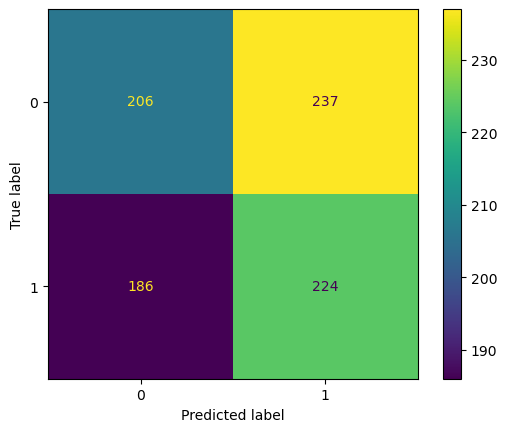

In [23]:
# Confusion matrix for the microsoftdata
metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
plt.show()

In [24]:
# predicting the target variable
feature = [[-0.299988,-1.889999,0]]
print("Standardized input data: ", feature)

prediction = models[2].predict(feature)
print("\n Prediction target value: ", prediction)

Standardized input data:  [[-0.299988, -1.889999, 0]]

 Prediction target value:  [1]
